# Proyek Analisis Data: Nama dataset
- Kelompok : 5 Keras
- Anggota : </br>
10122003 - Andrian Baros</br>
10122011 - Dida Aburahmani Danuwijaya</br>
10122016 - M Dhafin Putra</br>
10122017 - M Fathi Zaidan</br>
10122036 - Khotibul Umam

## Menentukan Pertanyaan Bisnis

1. Mengidentifikasi faktor-faktor yang paling dominan yang memengaruhi penggunaan sepeda menggunakan anlisis faktor 10122017 - Muhammad Fathi Zaidan

2. Berapa jumlah total peminjaman sepeda per jam dalam dataset ini? 10122003 - Andrian Baros


3. Bagaimana pengaruh cuaca (variabel "weathersit") terhadap jumlah peminjaman sepeda? - 10122016 M Dhafin Pu
4a  

4.Bagaimana pola penggunaan sepeda berubah selama musim (musim panas, musim gugur, musim dingin, musim semi)? - 10122011 Dida Aburahmani Danuwijaya

5.  apakah hari kerja mempengaruhi banyaknya peminjaman sepeda pada jam tertentu jika dibandingkan dengan hari libur - 10122036 Khotibul Umam


## Menyaipkan semua library yang dibuthkan

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from factor_analyzer import FactorAnalyzer
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

## Data Wrangling

### Gathering Data

In [6]:
df_data_hour = pd.read_csv('hour.csv')


In [7]:
df_data_day = pd.read_csv('day.csv')


### Assessing Data

In [8]:
df_data_hour.info()
df_data_hour.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [9]:
df_data_hour = df_data_hour.dropna(how='any',axis=0)

print("Null values removed successfully.")

df_data_hour.isnull().sum()

Null values removed successfully.


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df_data_hour.duplicated().any()

False

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
df_data_hour.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)


df_data_hour['datetime'] = pd.to_datetime(df_data_hour.datetime)


df_data_hour['season'] = df_data_hour.season.astype('category')
df_data_hour['is_holiday'] = df_data_hour.is_holiday.astype('category')
df_data_hour['weekday'] = df_data_hour.weekday.astype('category')
df_data_hour['weather_condition'] = df_data_hour.weather_condition.astype('category')
df_data_hour['is_workingday'] = df_data_hour.is_workingday.astype('category')
df_data_hour['month'] = df_data_hour.month.astype('category')
df_data_hour['year'] = df_data_hour.year.astype('category')
df_data_hour['hour'] = df_data_hour.hour.astype('category')

In [24]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Distribusi hitungan per jam pada hari kerja')]

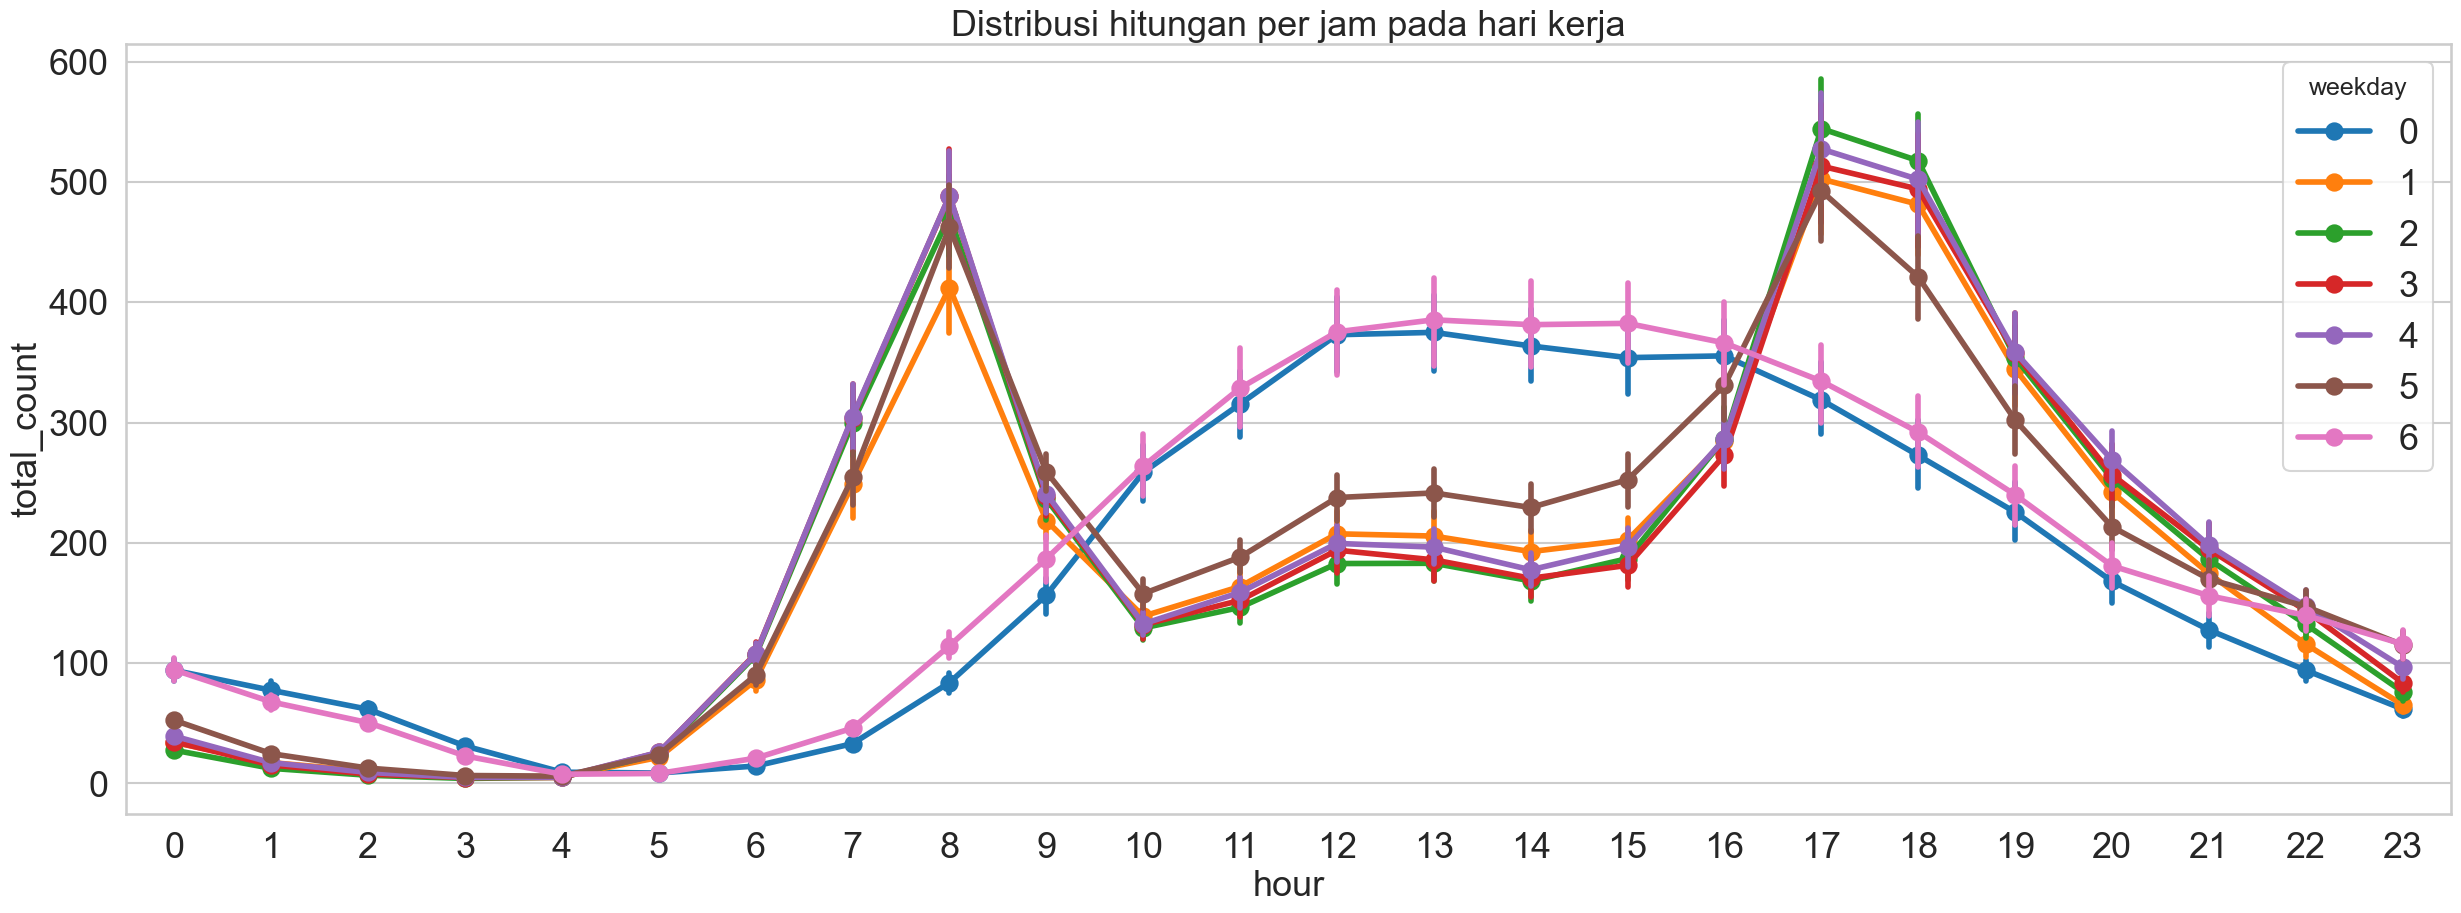

In [13]:
fig,ax = plt.subplots()
sns.pointplot(data=df_data_hour[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Distribusi hitungan per jam pada hari kerja")

[Text(0.5, 1.0, 'Distribusi hitungan per jam berdasarkan musim')]

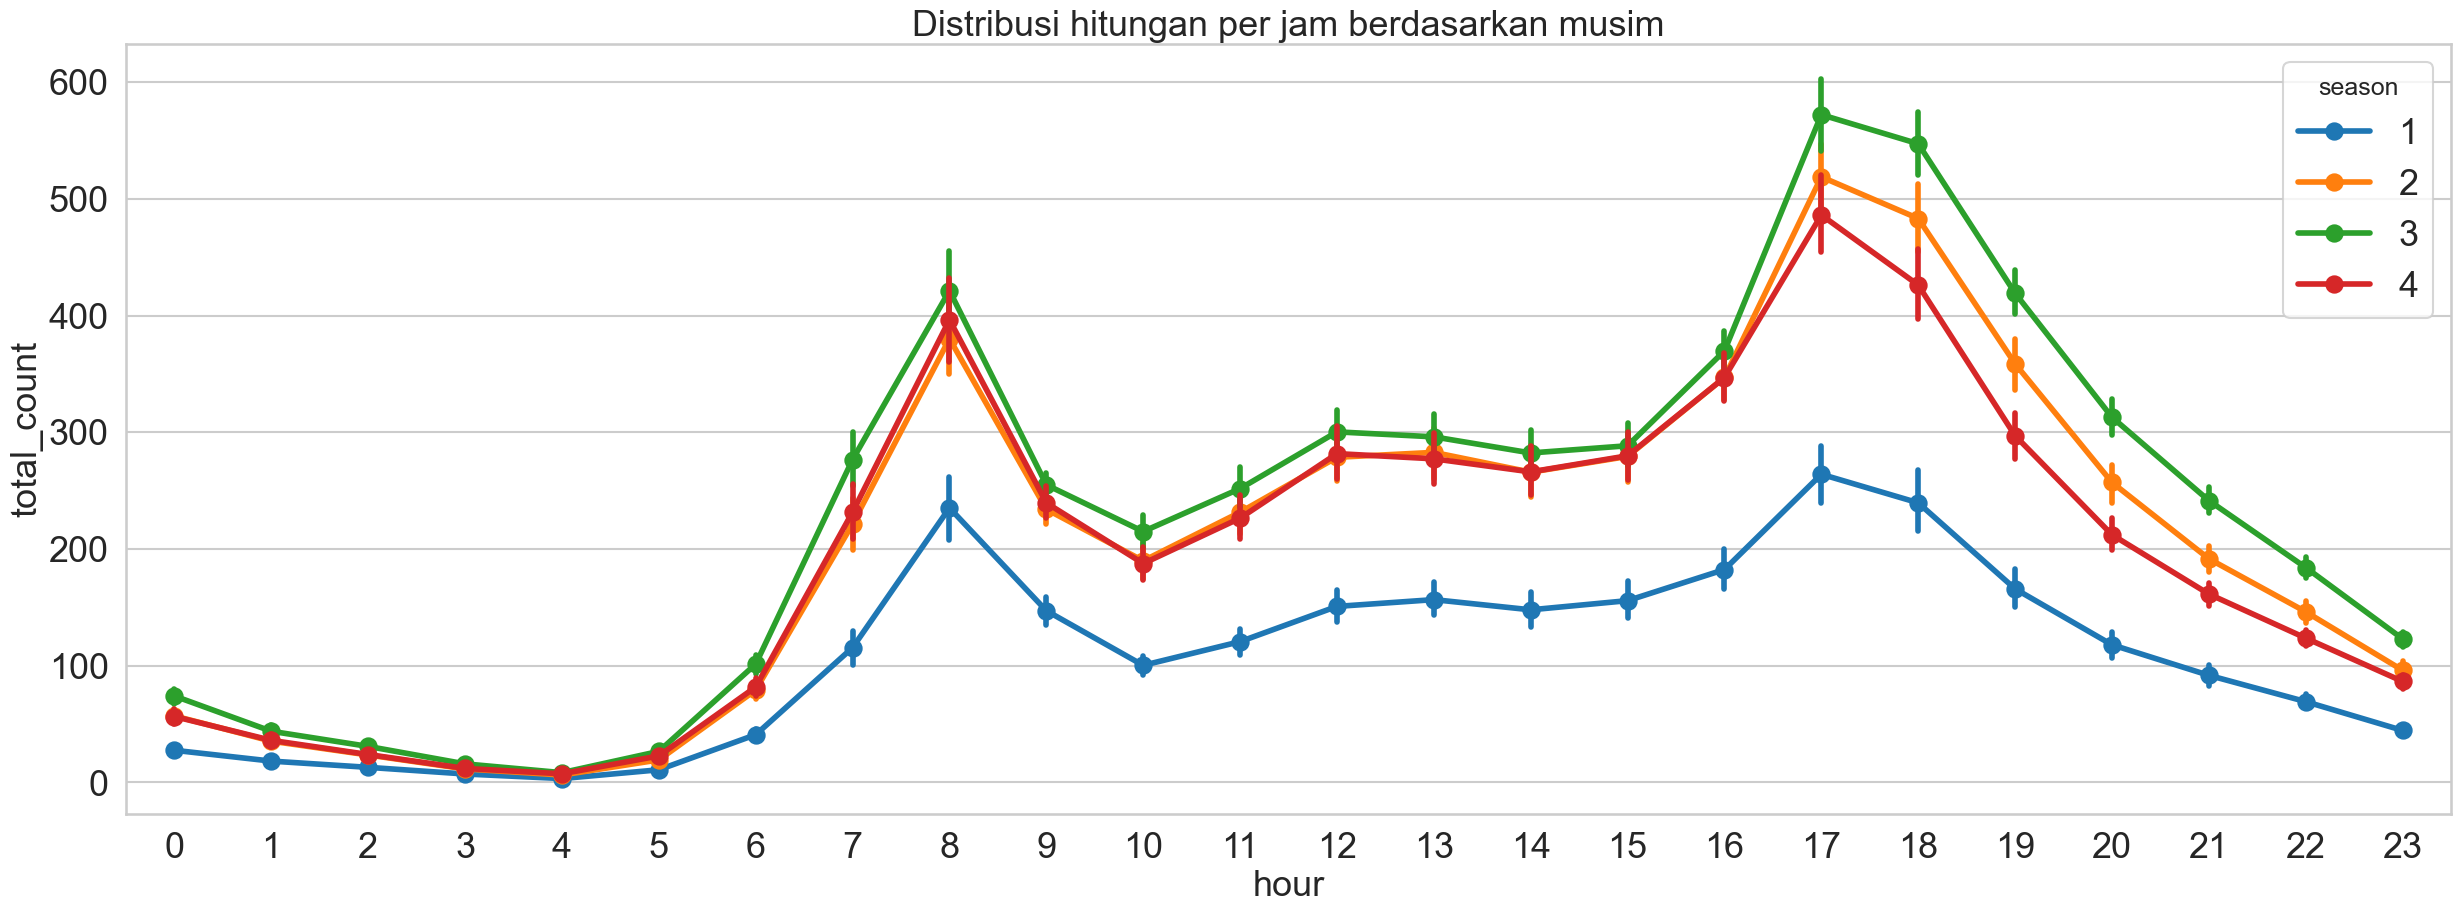

In [14]:
fig,ax = plt.subplots()
sns.pointplot(data=df_data_hour[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Distribusi hitungan per jam berdasarkan musim")

[Text(0.5, 1.0, 'Distribusi jumlah bulanan')]

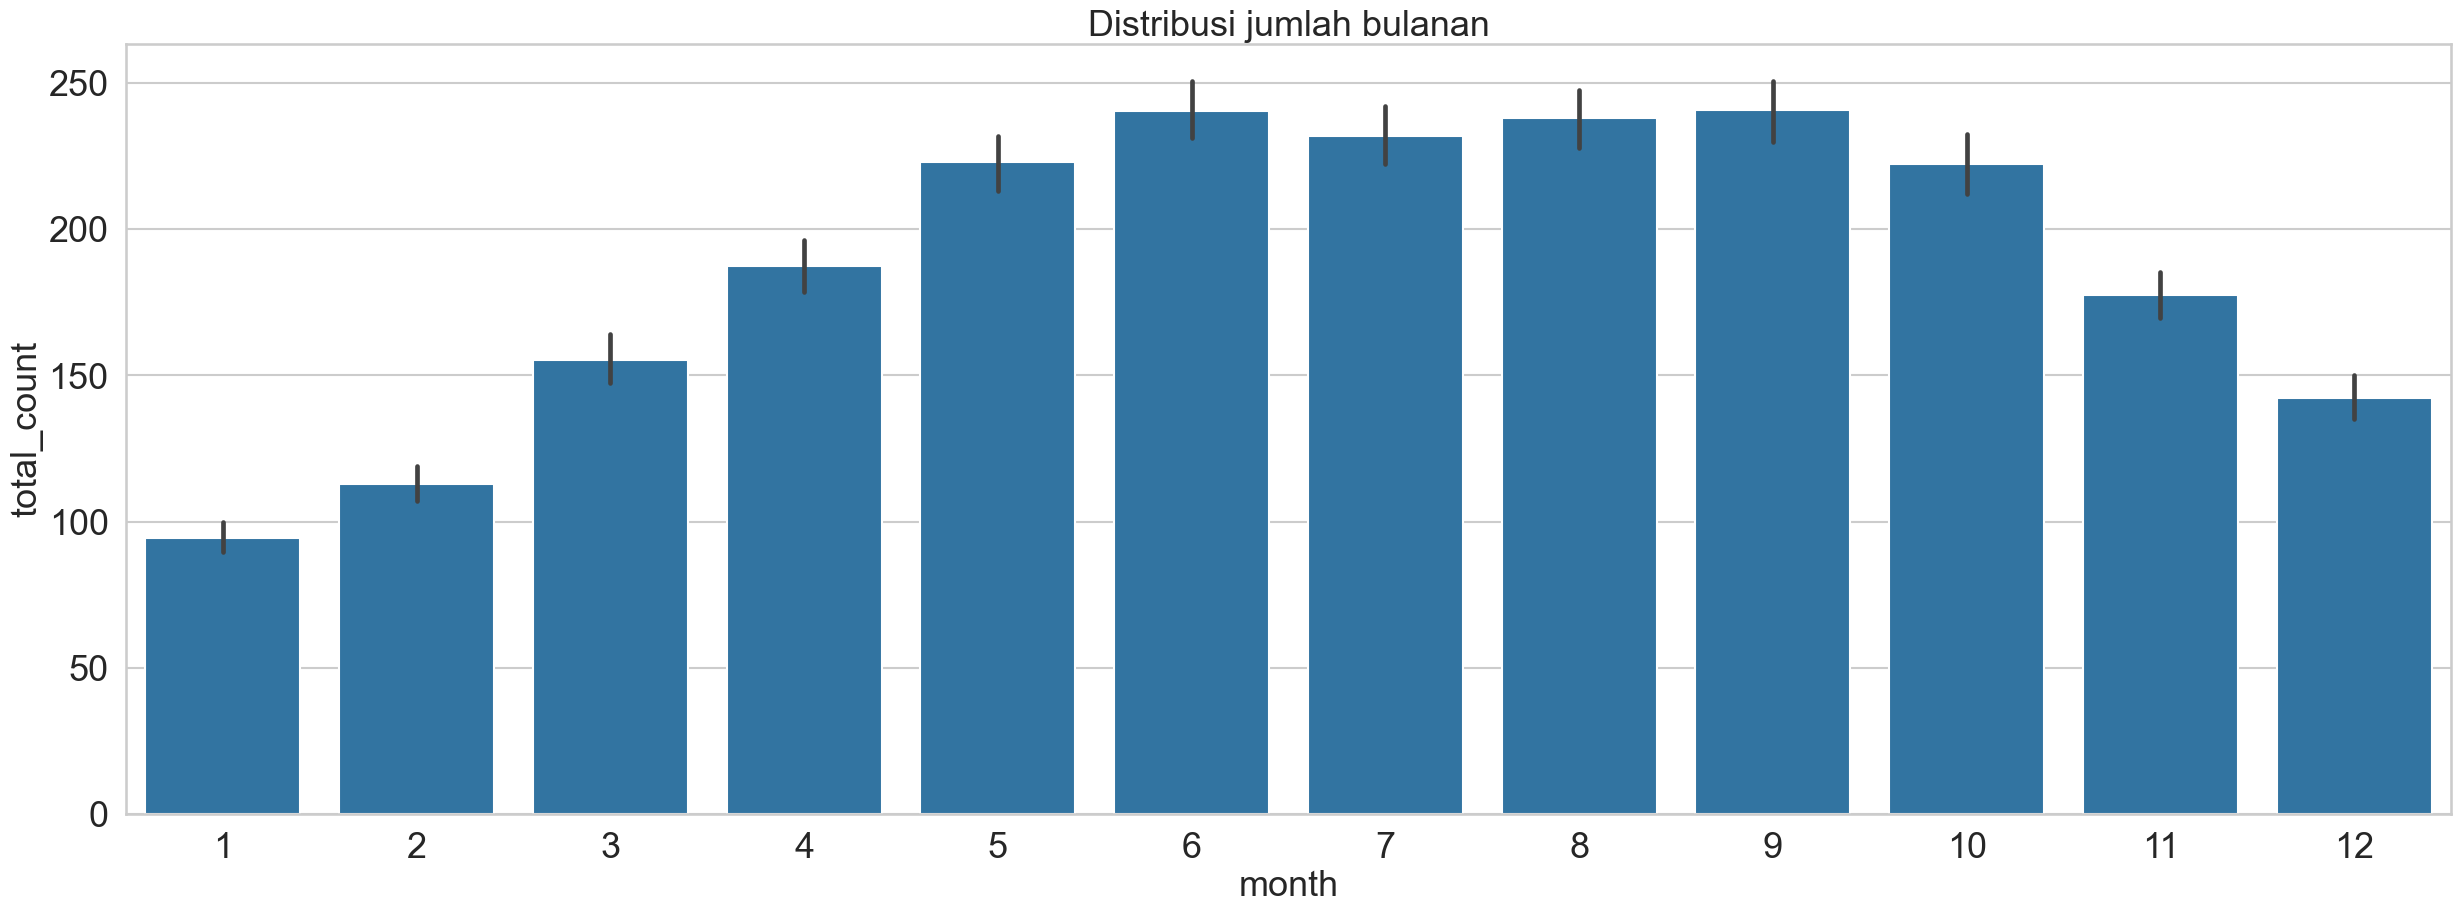

In [15]:
fig,ax = plt.subplots()
sns.barplot(data=df_data_hour[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Distribusi jumlah bulanan")

[Text(0.5, 1.0, 'Distribusi jumlah musiman')]

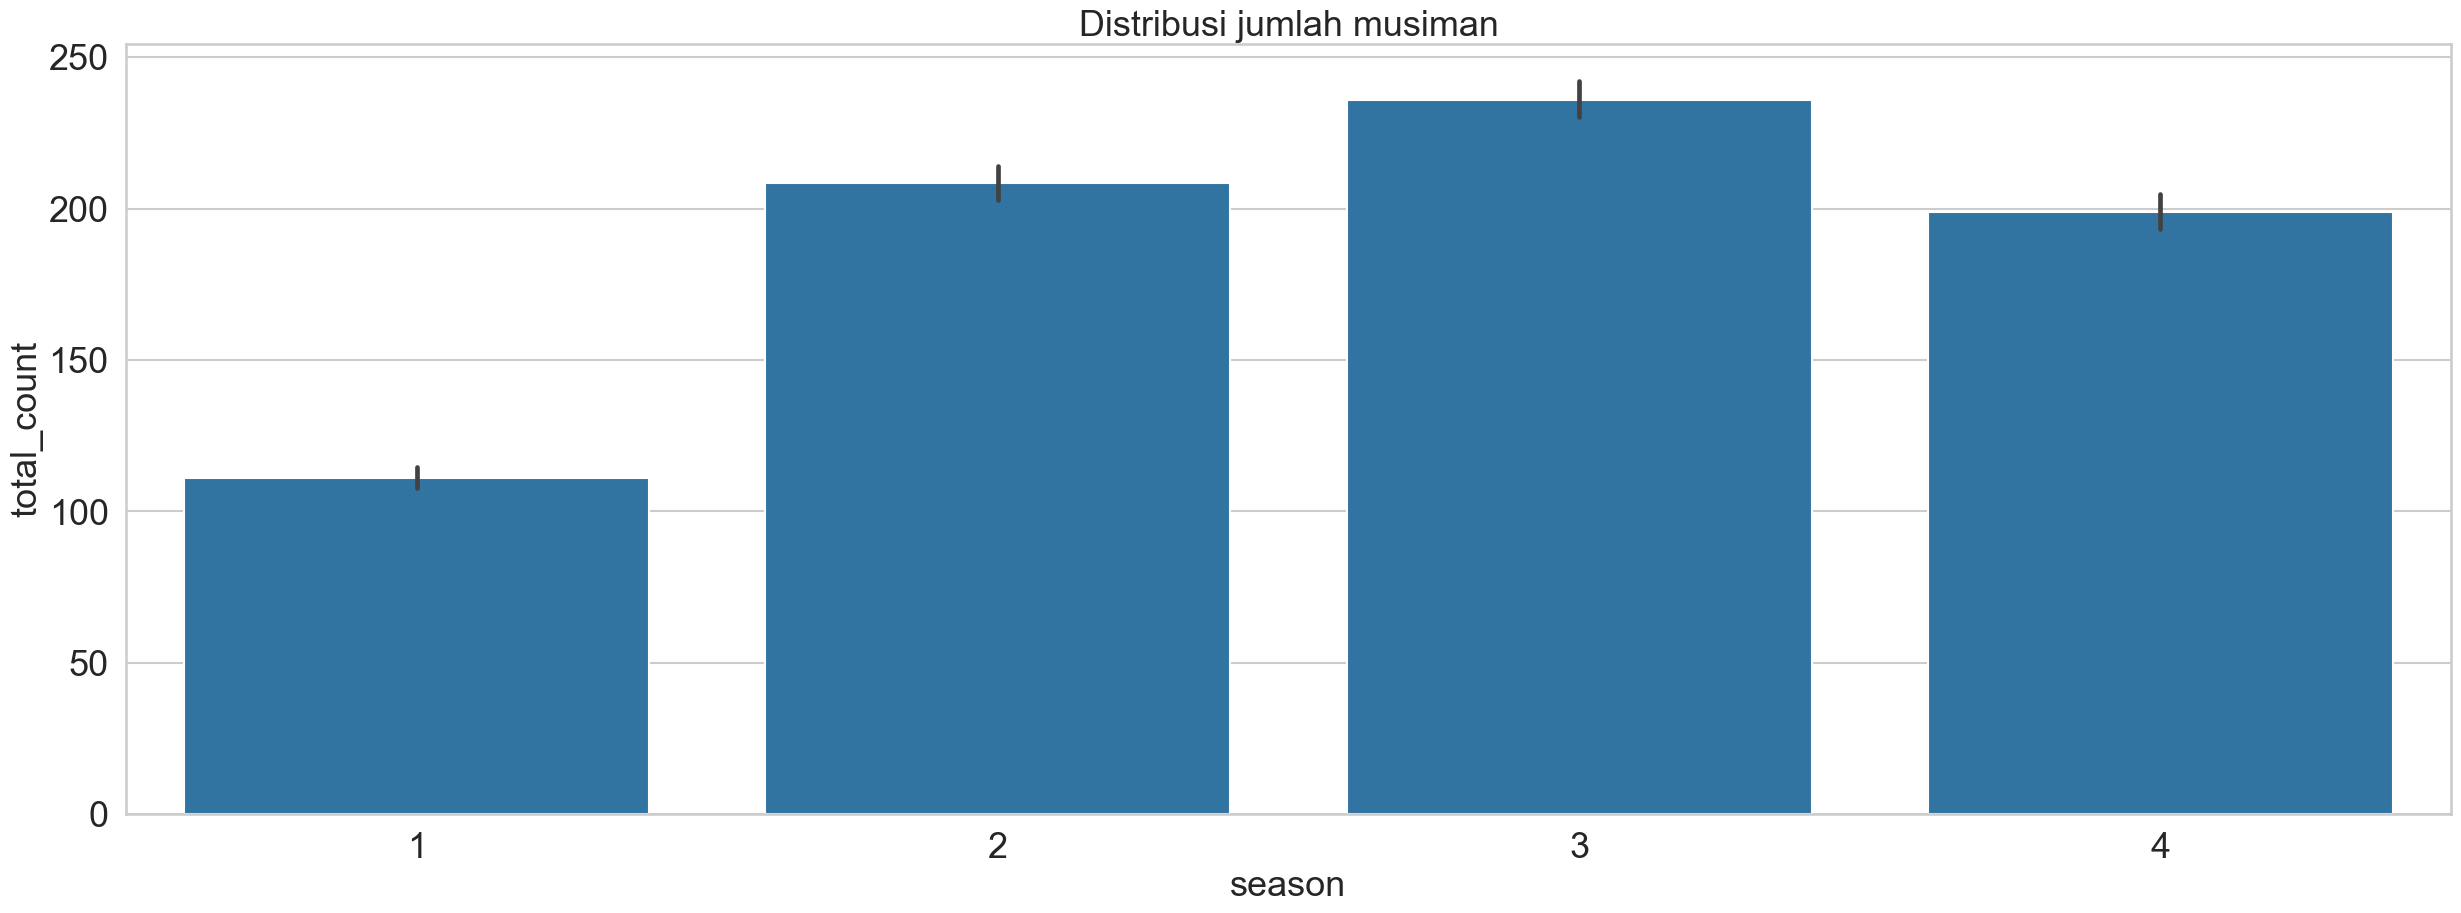

In [16]:
fig,ax = plt.subplots()
sns.barplot(data=df_data_hour[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Distribusi jumlah musiman")

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

Mengidentifikasi faktor-faktor yang paling dominan yang memengaruhi penggunaan sepeda menggunakan anlisis faktor
10122017 - Muhammad Fathi Zaidan

                Suhu  Kondisi Cuaca  Working Day
temp        0.944560      -0.046086     0.064111
atemp       0.958992      -0.035767     0.065882
hum         0.208134       0.976847     0.016388
windspeed  -0.246180      -0.116820    -0.012645
holiday    -0.035463      -0.002385    -0.241333
weekday     0.015366      -0.040927     0.037378
workingday -0.009180       0.007315     1.011066
weathersit -0.126883       0.627528     0.054473
casual      0.632687      -0.224206    -0.474332
registered  0.591906      -0.255478     0.266224
Variance Explained:
(array([2.68410639, 1.48234202, 1.38960603]), array([0.26841064, 0.1482342 , 0.1389606 ]), array([0.26841064, 0.41664484, 0.55560544]))


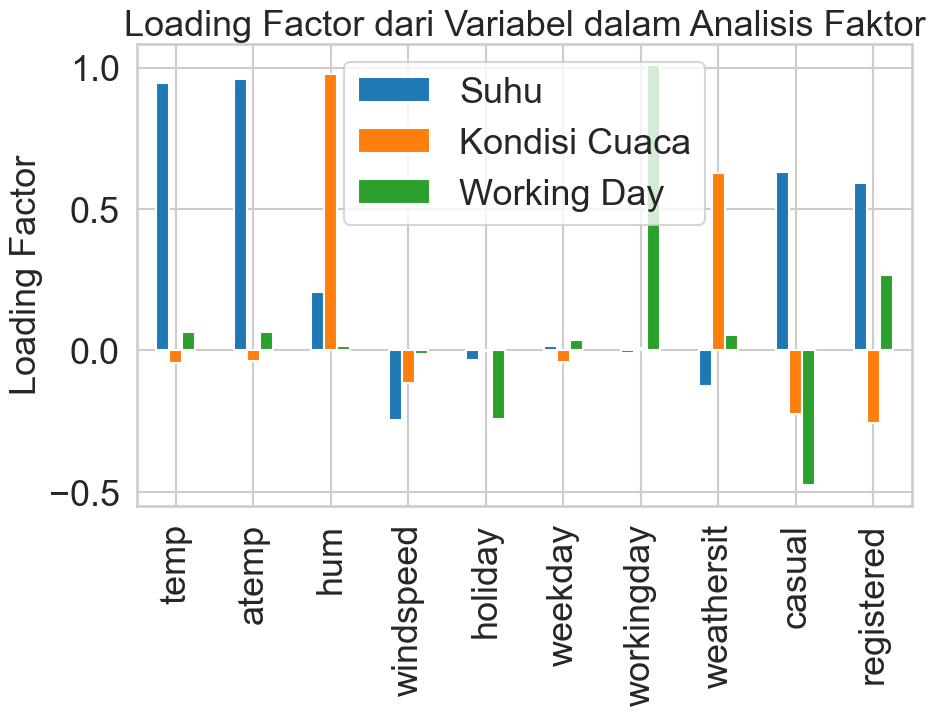

In [25]:
file_path = "day.csv"

data = pd.read_csv(file_path)

features = data[['temp', 'atemp', 'hum', 'windspeed', 'holiday', 'weekday', 'workingday', 'weathersit', 'casual', 'registered']]

factor_analyzer = FactorAnalyzer(n_factors=3, rotation='varimax')
factor_analyzer.fit(features)

loading_factor = factor_analyzer.loadings_
loading_factor = pd.DataFrame(loading_factor, index=features.columns, columns=['Suhu', 'Kondisi Cuaca', 'Working Day'])
print(loading_factor)

print(f"Variance Explained:\n{factor_analyzer.get_factor_variance()}")

loading_factor.plot(kind='bar', figsize=(10, 6), title='Loading Factor dari Variabel dalam Analisis Faktor')
plt.ylabel('Loading Factor')
plt.show()


Matriks Factor Loadingsini menunjukkan seberapa besar setiap variabel berkontribusi terhadap setiap faktor. Koefisien di dalam matriks ini disebut beban faktor.

### Pertanyaan 2: 

10122003 - Andrian Baros <hr>
Berapa jumlah total peminjaman sepeda per jam dalam dataset ini?

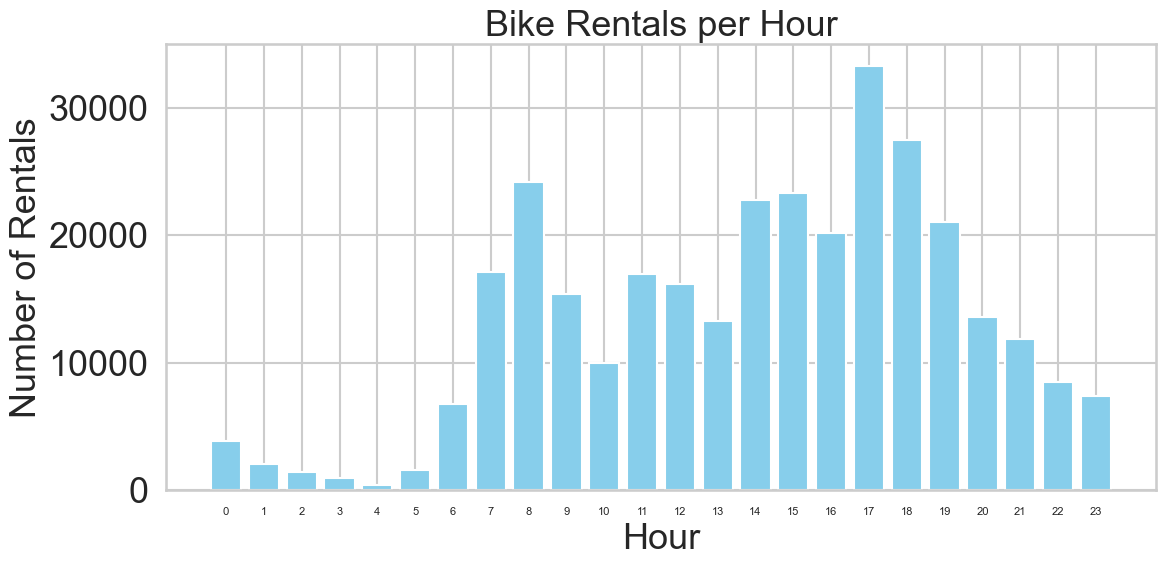

'Total number of bike rentals: 319472'

In [18]:
# Data sampel
df_sample = df_data_hour.sample(frac=0.1, random_state=42)

# Agregasi data per jam
df_hourly_aggregated = df_sample.groupby('hour', observed=False)['total_count'].sum().reset_index()

# Hitung total jumlah sewa sepeda
total_sewa = df_sample['total_count'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_hourly_aggregated['hour'], df_hourly_aggregated['total_count'], color='skyblue')
plt.title('Bike Rentals per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.xticks(df_hourly_aggregated['hour'], fontsize=8)  
plt.grid(True)
plt.tight_layout() 
plt.show()

# Tampilkan total jumlah sewa sepeda
display(f'Total number of bike rentals: {total_sewa}')


### Pertanyaan 3:

Bagaimana pengaruh cuaca (variabel "weathersit") terhadap jumlah peminjaman sepeda?
10122016 - M Dhafin Putra

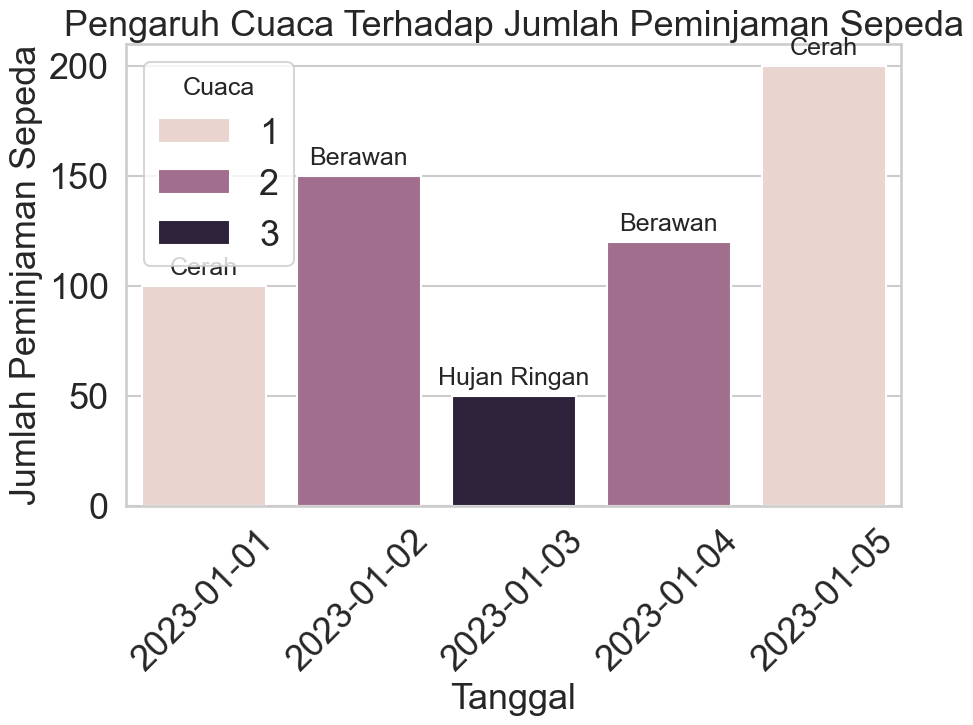

In [19]:
# Membuat dataset contoh
data = {
    'instant': [1, 2, 3, 4, 5],
    'dteday': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'weathersit': [1, 2, 3, 2, 1],
    'cnt': [100, 150, 50, 120, 200],
    'weather_info': ['Cerah', 'Berawan', 'Hujan Ringan', 'Berawan', 'Cerah']
}

df = pd.DataFrame(data)

# Membuat diagram batang seperti pada kode di bawah
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df[['dteday', 'cnt', 'weathersit']],
            x='dteday',
            y='cnt',
            hue='weathersit',
            ax=ax)
ax.set(xlabel='Tanggal', ylabel='Jumlah Peminjaman Sepeda', title='Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda')
plt.legend(title='Cuaca', loc='upper left')
plt.xticks(rotation=45)

# Menambahkan anotasi informasi cuaca pada setiap batang
for i, row in df.iterrows():
    ax.text(i, row['cnt'] + 5, row['weather_info'], ha='center')

plt.show()


### Pertanyaan 4

Bagaimana pola penggunaan sepeda berubah selama musim (musim panas, musim gugur, musim dingin, musim semi)? <br>10122011 - Dida Aburahmani Danuwijaya

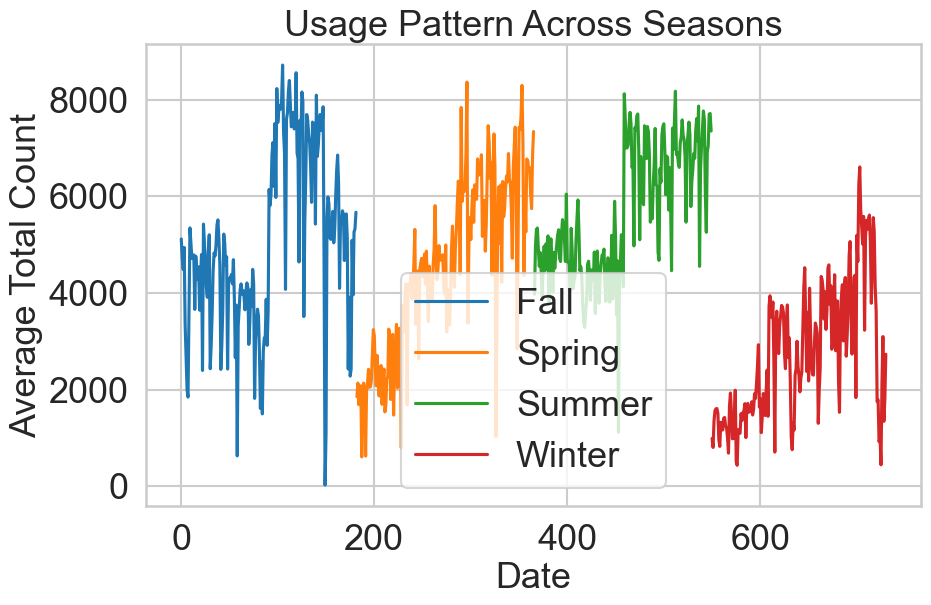

In [20]:

# Let's assume df_data_seasonal is your DataFrame containing columns 'date' and 'total_count'

# Assuming you have a column 'date', convert it to datetime if it's not already
df_data_day['dteday'] = pd.to_datetime(df_data_day['dteday'])

# Extract the season from the date
df_data_day['season'] = df_data_day['dteday'].dt.month.map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
})

# Calculate the average total count per day for each season
average_seasonal_data = df_data_day.groupby(['season', 'dteday']).mean().reset_index()

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use Pandas plot to visualize the distribution
average_seasonal_data.groupby('season')['cnt'].plot(ax=ax, legend=True)

# Set plot title and labels
plt.title('Usage Pattern Across Seasons')
plt.xlabel('Date')
plt.ylabel('Average Total Count')

# Show the plot
plt.show()




In [21]:
print(df_data_day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


### Pertanyaan 5

 apakah hari kerja mempengaruhi banyaknya peminjaman sepeda pada jam tertentu jika dibandingkan dengan hari libur 10122036 - Khotibul Umam

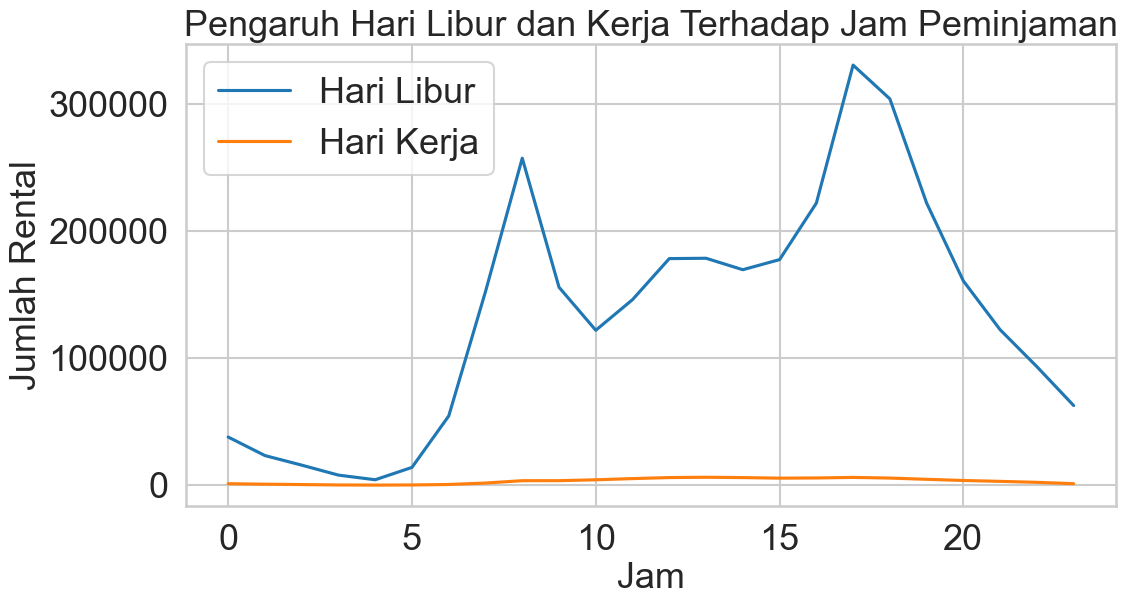

In [22]:
# Load data
data = pd.read_csv("hour.csv")

# Gambaran jumlah penyewaan sepeda berdasarkan jam
data.groupby(["hr", "holiday"])["cnt"].sum().unstack().plot(
    xlabel="Jam", ylabel="Jumlah Rental", figsize=(12, 6)
)

# Menambahkan legenda
plt.title('Pengaruh Hari Libur dan Kerja Terhadap Jam Peminjaman')
plt.legend(["Hari Libur", "Hari Kerja"], loc="upper left")
plt.show()

## Conclusion

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Load data
df_data_hour = pd.read_csv('hour.csv')
df_data_day = pd.read_csv('day.csv')

# Clean data
df_data_hour = df_data_hour.dropna(how='any',axis=0)
df_data_hour.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

df_data_hour['datetime'] = pd.to_datetime(df_data_hour.datetime)

df_data_hour['season'] = df_data_hour.season.astype('category')
df_data_hour['is_holiday'] = df_data_hour.is_holiday.astype('category')
df_data_hour['weekday'] = df_data_hour.weekday.astype('category')
df_data_hour['weather_condition'] = df_data_hour.weather_condition.astype('category')
df_data_hour['is_workingday'] = df_data_hour.is_workingday.astype('category')
df_data_hour['month'] = df_data_hour.month.astype('category')
df_data_hour['year'] = df_data_hour.year.astype('category')
df_data_hour['hour'] = df_data_hour.hour.astype('category')

# Function to answer each question
def question_1():
    st.markdown("### Question 1")
    st.markdown("Identifying the most dominant factors influencing bike usage using factor analysis")
    # Your analysis code for Question 1

def question_2():
    st.markdown("### Question 2")
    st.markdown("Total bike rentals per hour in this dataset")
    # Your analysis code for Question 2

def question_3():
    st.markdown("### Question 3")
    st.markdown("The impact of weather conditions on bike rentals")
    # Your analysis code for Question 3

def question_4():
    st.markdown("### Question 4")
    st.markdown("Changes in bike usage patterns across seasons")
    # Your analysis code for Question 4

def question_5():
    st.markdown("### Question 5")
    st.markdown("Impact of working days on bike rentals compared to holidays")
    # Your analysis code for Question 5

# Sidebar menu
st.sidebar.title("Choose a question")
question = st.sidebar.selectbox("Questions", ["Question 1", "Question 2", "Question 3", "Question 4", "Question 5"])

# Display based on selected question
if question == "Question 1":
    question_1()
elif question == "Question 2":
    question_2()
elif question == "Question 3":
    question_3()
elif question == "Question 4":
    question_4()
elif question == "Question 5":
    question_5()
